In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df = df.drop(['petal length (cm)','petal width (cm)'],axis = 'columns')
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [5]:
from sklearn.cluster import KMeans

In [8]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

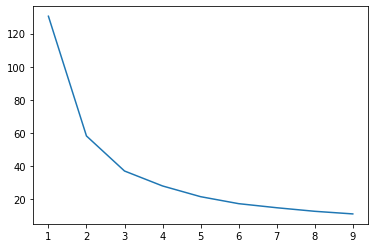

In [9]:
import matplotlib.pyplot as plt
plt.plot(k_rng,sse)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scalre = MinMaxScaler()
df['sepal length (cm)'] = scalre.fit_transform(df[['sepal length (cm)']])
df['sepal width (cm)'] = scalre.fit_transform(df[['sepal width (cm)']])

In [13]:
km = KMeans(n_clusters=3)
ypredicted = km.fit_predict(df)
df['cluster'] = ypredicted

In [14]:
df.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


In [15]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

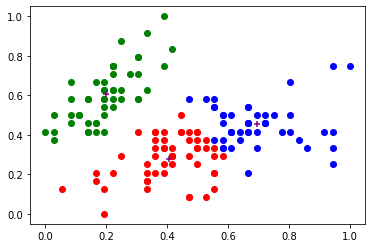

In [17]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+')